Make plots of the susceptibility as a function of $\beta$ coloured according to the metastable solution's magnetisation.

Uses data generated in *fig2-CDE-simulations.py*.

Created on: 30/01/20

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [2]:
data=pd.read_csv("Data/three_block_sus_data.csv")

In [3]:
block_cont_data=data

In [12]:
#Distinct values of the beta values:
beta_f_vals= list(set(list(block_cont_data['beta_factor'])))

#Clustering according to the final magnetisation:
block_contr_w_clusters=pd.DataFrame()
for beta_factor in tqdm(beta_f_vals):

    current_df = block_cont_data.loc[(block_cont_data['beta_factor'] == beta_factor)]

    #Round magnetisation values in order to 'cluster' them:
    #Plus zero stops -0.0 and 0.0 from being treated differently.
    rounded_vals = [round(k, 2) + 0.0 for k in list(current_df['magnetisation'])]
    clus_labels = {}
    for index, k in enumerate(sorted(list(set(rounded_vals)))):
        clus_labels[k] = index

    current_df['mag_rounded'] = rounded_vals
    current_df['Solution'] = [ "Solution {}, M = {}".format(int(clus_labels[p]+1),p) for p in rounded_vals]
    current_df['Sol Lab'] = [ int(clus_labels[p]+1) for p in rounded_vals]

    #Label clusters based on sorting cluster means.
    block_contr_w_clusters = block_contr_w_clusters.append(current_df)

block_cont_data=block_contr_w_clusters

/home/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [13]:
block_cont_data.head()

,Unnamed: 0,beta_factor,init_cond,magnetisation,m1,m2,m3,susB1,susB2,susB3,m_fp_convergence,mag_rounded,Solution,Sol Lab
0,0,0.5,"[0.9755886063508306, 0.013189047116860309, 0.0...",0.000004,0.238119,0.000003,-0.238110,0.563520,0.604059,0.563523,"[0.3591510186401927, 0.1227907829396998, 0.043...",0.0,"Solution 1, M = 0.0",1
25,0,0.5,"[0.384052666852587, 0.6377274747048265, 0.8168...",0.000003,0.238117,0.000003,-0.238110,0.563520,0.604059,0.563523,"[0.6128635516169163, 0.23354477902160176, 0.08...",0.0,"Solution 1, M = 0.0",1
50,0,0.5,"[0.06785138329233709, -0.2922817245753693, 0.7...",0.000005,0.238118,0.000005,-0.238108,0.563519,0.604059,0.563524,"[0.1700358710224207, 0.07999890550197075, 0.03...",0.0,"Solution 1, M = 0.0",1
75,0,0.5,"[-0.07887112447057665, -0.9625081136675937, -0...",-0.000002,0.238109,-0.000002,-0.238114,0.563523,0.604059,0.563521,"[-0.5706800770452455, -0.20251725160921497, -0...",0.0,"Solution 1, M = 0.0",1
100,0,0.5,"[-0.6150180096519293, 0.6945845750976809, -0.0...",0.000003,0.238114,0.000004,-0.238109,0.563521,0.604059,0.563523,"[0.005037821636258026, 0.005011249966728822, 0...",0.0,"Solution 1, M = 0.0",1


# Make plots

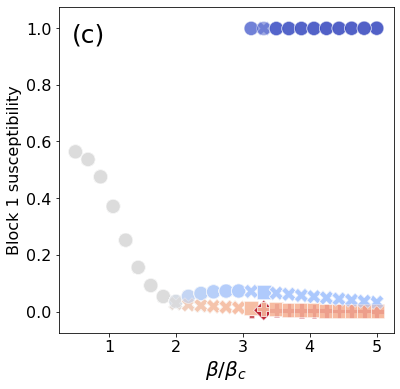

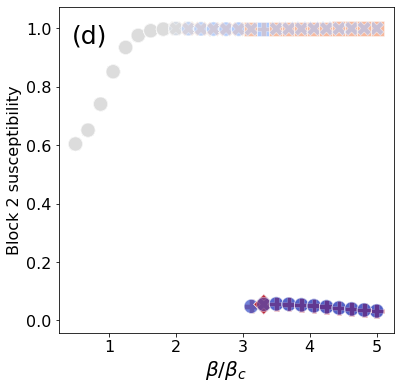

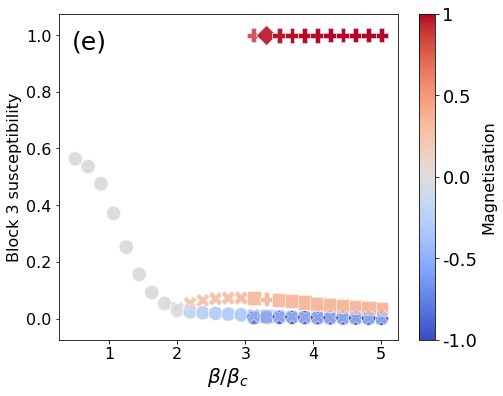

In [14]:
plt.figure(1,figsize=(6,6))
sns.scatterplot(x='beta_factor',y='susB1',data=block_cont_data,hue='magnetisation',palette='coolwarm',s=200,legend=False,alpha=0.5,style='Sol Lab')
plt.xlabel("$\\beta / \\beta_c$",fontsize=20)
plt.ylabel("Block 1 susceptibility",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.text(0.45,0.95,'(c)',fontsize=25)
plt.savefig("Plots/Block_1_susphase.jpg",bbox_inches='tight')

plt.figure(2,figsize=(6,6))
sns.scatterplot(x='beta_factor',y='susB2',data=block_cont_data,hue='magnetisation',palette='coolwarm',s=200,legend=False,alpha=0.5,style='Sol Lab')
plt.xlabel("$\\beta / \\beta_c$",fontsize=20)
plt.ylabel("Block 2 susceptibility",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.text(0.45,0.95,'(d)',fontsize=25)
plt.savefig("Plots/Block_2_susphase.jpg",bbox_inches='tight')


plt.figure(3,figsize=(7.6,6))
sns.scatterplot(x='beta_factor',y='susB3',data=block_cont_data,hue='magnetisation',palette='coolwarm',s=200,legend=False,alpha=0.5,style='Sol Lab')
plt.xlabel("$\\beta / \\beta_c$",fontsize=20)
plt.ylabel("Block 3 susceptibility",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.text(0.45,0.95,'(e)',fontsize=25)

ax=plt.gca()
mags=list(block_cont_data['magnetisation'])
norm = plt.Normalize(-1.0, 1.0)
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=14) 
cbar.set_label('Magnetisation', fontsize=16)
cbar.ax.tick_params(labelsize=18) 
cbar.set_ticks([-1.0,-0.5,0.0,0.5,1.0])
cbar.set_ticklabels(['-1.0', '-0.5', '0.0', '0.5', '1'])

plt.savefig("Plots/Block_3_susphase.jpg",bbox_inches='tight')